In [47]:
import numpy as np
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [48]:
import os 
os.chdir('C:\\College\\Machine Learnings\\Part 3 - Classification\\Section 14 - Logistic Regression\\Logistic_Regression')
os.getcwd()

'C:\\College\\Machine Learnings\\Part 3 - Classification\\Section 14 - Logistic Regression\\Logistic_Regression'

In [49]:
social_ntw = pd.read_csv('Social_Network_Ads.csv')
social_ntw.head(n=1)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0


In [50]:
social_ntw[social_ntw[ 'User ID'].isna()]
social_ntw[social_ntw[ 'Gender'].isna()]
social_ntw[social_ntw[ 'Age'].isna()]
social_ntw[social_ntw[ 'EstimatedSalary'].isna()]
social_ntw[social_ntw[ 'Purchased'].isna()]

,User ID,Gender,Age,EstimatedSalary,Purchased


In [51]:
social_ntw.loc[social_ntw['Purchased']==1,'Purchased'] = 'Yes'

In [52]:
social_ntw.loc[social_ntw['Purchased']==0,'Purchased'] = 'No'

In [93]:
### Imp variables are as follows Gender Age and Salary in X and Purchased in Y
### Handle categorical variables
X = social_ntw.iloc[:,1:4].values
Y = social_ntw.iloc[:,4] .values
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [94]:
labelencoder = LabelEncoder()
X[:,0]=labelencoder.fit_transform(X[:,0])
onehotencoder =OneHotEncoder(categorical_features=[0])
#Y[:,0]=labelencoder.fit_transform(Y[:,0:])


In [95]:
######## Train set and Test set
from sklearn.cross_validation import train_test_split
X_train,X_test,Y_train,Y_test =train_test_split(X,Y,random_state=0,test_size=0.2)

In [96]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_Y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
#Y_train = sc_Y.fit_transform(Y_train)
#Y_test = sc_Y.transform(Y_test)

In [97]:
from sklearn.neighbors import KNeighborsClassifier
K_nearest_classifier = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
K_nearest_classifier.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [98]:
from sklearn.metrics import confusion_matrix
confusion_mat = confusion_matrix(Y_train,K_nearest_classifier.predict(X_train))
confusion_mat

array([[182,  17],
       [ 12, 109]], dtype=int64)

In [99]:
from sklearn.metrics import confusion_matrix
confusion_mat_train = confusion_matrix(Y_test,K_nearest_classifier.predict(X_test))
confusion_mat_train

array([[55,  3],
       [ 1, 21]], dtype=int64)

In [102]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
Y_train_new = labelencoder.fit_transform(Y_train)
Y_train_new =Y_train_new.reshape(len(Y_train_new))

from sklearn.neighbors import KNeighborsClassifier
K_new_classifier = KNeighborsClassifier(n_neighbors=5,p=2,metric='minkowski')
K_new_classifier.fit(X_train[:,1:],Y_train_new)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

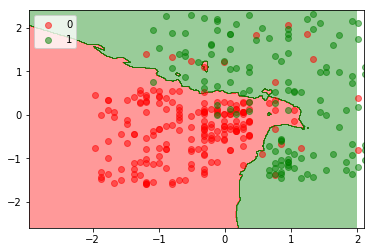

In [111]:
from matplotlib.colors import ListedColormap
X_set,Y_set = X_train[:,1:],Y_train_new
X1,X2 = np.meshgrid(np.arange(start = X_set[:,0].min()-1, stop= X[:,0].max() + 1, step= 0.01),
                     np.arange(start=X_set[:,1].min()-1,stop= X[:,1].max() + 1, step=0.01))
plt.contourf(X1,X2,K_new_classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
             cmap=ListedColormap(('red','green')),alpha=0.4)
plt.xlim(X1.min(),2.1)
plt.ylim(X2.min(),2.4)
for i,j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j,0],X_set[Y_set == j,1],c=ListedColormap(('red','green'))(j),label=j,alpha=0.5)
plt.legend()
plt.show()


In [84]:
np.unique(Y_set)

array([0, 1], dtype=int64)